In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Unzip package from IUPMS

In [ ]:
path = '/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/cps_00002.csv.gz'

In [ ]:
import gzip

def unpack_gz(file_path):
  with gzip.open(file_path, 'rb') as f_in:
      # You can either read the content into memory
      # content = f_in.read()
      # Or write it to a new file
      output_path = file_path.replace('.gz', '')
      with open(output_path, 'wb') as f_out:
          f_out.writelines(f_in)
  print(f"Unpacked {file_path} to {output_path}")
  return output_path

unpacked_file_path = unpack_gz(path)

Unpacked /content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/cps_00002.csv.gz to /content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/cps_00002.csv


### Separate Multi-year data into individual csv files

In [3]:
new_path = '/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/cps_00001.csv'
df = pd.read_csv(new_path)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-3-3712555941.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
df['MONTH'].value_counts()

,count
MONTH,
3,1057276


In [ ]:
df.shape

(1057276, 23)

In [ ]:
df.columns

Index(['YEAR', 'SERIAL', 'MONTH', 'CPSID', 'ASECFLAG', 'ASECWTH', 'PERNUM',
       'CPSIDP', 'CPSIDV', 'ASECWT', 'RELATE', 'AGE', 'SEX', 'RACE', 'MARST',
       'BPL', 'OCC', 'CLASSWKR', 'UHRSWORK1', 'EDUC', 'INCTOT', 'CAPGAIN',
       'CAPLOSS'],
      dtype='object')

In [4]:
unique_years = df['YEAR'].unique()

In [ ]:
unique_years

array([2000, 2005, 2010, 2015, 2020, 2023])

In [ ]:
# Create a dictionary of yearly DataFrames
dfs_by_year = {year: df[df['YEAR'] == year].copy() for year in df['YEAR'].unique()}

In [ ]:
dfs_by_year[2000]

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,PERNUM,CPSIDP,CPSIDV,ASECWT,...,RACE,MARST,BPL,OCC,CLASSWKR,UHRSWORK1,EDUC,INCTOT,CAPGAIN,CAPLOSS
0,2000,2,3,19981202520100,1,974.38,1,19981202520101,199812025201011,974.38,...,100,4,45300,146,27,45,125,78644,0.0,0.0
1,2000,2,3,19981202520100,1,974.38,2,19981202520102,199812025201021,1132.77,...,100,6,9900,877,21,10,50,2668,0.0,0.0
2,2000,3,3,20000103263800,1,809.33,1,20000103263801,200001032638011,809.33,...,100,5,9900,0,0,999,81,26049,1136.0,0.0
3,2000,3,3,20000103263800,1,809.33,2,20000103263802,200001032638021,1151.48,...,100,6,9900,505,21,43,81,12031,0.0,0.0
4,2000,4,3,20000102304500,1,946.16,1,20000102304501,200001023045011,946.16,...,100,4,9900,274,21,39,73,20010,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133705,2000,64940,3,19981205976100,1,803.70,5,19981205976104,199812059761041,1018.33,...,650,6,9900,0,0,999,1,999999999,99999.0,99999.0
133706,2000,64940,3,19981205976100,1,803.70,6,19981205976106,199812059761061,941.27,...,650,6,9900,0,0,999,1,999999999,99999.0,99999.0
133707,2000,64940,3,19981205976100,1,803.70,7,19981205976107,199812059761072,866.26,...,650,6,9900,0,0,999,50,0,0.0,0.0
133708,2000,64944,3,20000301557000,1,959.00,1,20000301557001,200003015570011,959.00,...,100,6,9900,435,21,25,92,24500,0.0,0.0


In [5]:
new_path2 = '/content/drive/MyDrive/UCL_MSc_AI/UCLFinalProj/cps_00002.csv'
df2 = pd.read_csv(new_path2)
df2 = df2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-5-3976560713.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
df2.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,PERNUM,CPSIDP,CPSIDV,ASECWT,...,RACE,MARST,BPL,OCC,CLASSWKR,UHRSWORK1,EDUC,INCTOT,CAPGAIN,CAPLOSS
0,1994,1,3,19940302415800,1,878.58,1,19940302415801,199403024158011,878.58,...,100,1,43300,0,0,0,30,0,0,0
1,1994,1,3,19940302415800,1,878.58,2,19940302415802,199403024158021,878.58,...,100,1,43300,0,0,0,10,4524,0,0
2,1994,2,3,19940302415700,1,841.89,1,19940302415701,199403024157011,841.89,...,100,6,9900,0,0,0,73,0,0,0
3,1994,3,3,19940302415600,1,878.58,1,19940302415601,199403024156011,878.58,...,100,1,9900,0,0,0,81,24000,0,0
4,1994,3,3,19940302415600,1,878.58,2,19940302415602,199403024156021,878.58,...,100,1,9900,0,0,0,71,5800,0,0


In [ ]:
df2.shape

(150943, 38)

In [ ]:
df2['OCC'].value_counts()

,count
OCC,
0,76387
22,3501
243,2610
313,2060
276,1819
...,...
233,1
655,1
553,1


In [ ]:
# remove values with 0 from OCC
df2 = df2[df2['OCC'] != 0]

In [ ]:
df2.shape

(74556, 23)

In [ ]:
df2_copy = load_and_process_ipums(df2)

In [ ]:
df2_copy['occupation'].value_counts()

,count
occupation,
Prof-specialty,12639
Adm-clerical,9674
Other-service,9216
Machine-op-inspct,6920
Craft-repair,6274
Transport-moving,6178
?,5853
Tech-support,5619
Sales,5362


### **Processing**

In [6]:
'''
Mapping reference:

https://cps.ipums.org/cps/codes/occ_19922002_codes.shtml

https://cps.ipums.org/cps/codes/occ_20032010_codes.shtml

https://cps.ipums.org/cps/codes/occ_20112019_codes.shtml

'''

def map_occupation_by_year(row):
    year = row['YEAR']
    occ_code = row['OCC']

    # --- OCC code mappings for UCI occupation categories ---

    if 1992 <= year <= 2002:
        occ_map = {
            **dict.fromkeys(range(3, 22), 'Exec-managerial'),
            **dict.fromkeys(range(23, 199), 'Prof-specialty'),
            **dict.fromkeys(range(200, 255), 'Tech-support'),
            **dict.fromkeys(range(256, 285), 'Sales'),
            **dict.fromkeys(range(303, 309), 'Machine-op-inspct'),
            **dict.fromkeys(range(313, 389), 'Adm-clerical'),
            **dict.fromkeys(range(403, 407), 'Priv-house-serv'),
            **dict.fromkeys(range(413, 426), 'Protective-serv'),
            **dict.fromkeys(range(427, 469), 'Other-service'),
            **dict.fromkeys(range(473, 499), 'Farming-fishing'),
            **dict.fromkeys(range(503, 599), 'Craft-repair'),
            **dict.fromkeys(range(657, 688), 'Craft-repair'),
            **dict.fromkeys(range(613, 656), 'Machine-op-inspct'),
            **dict.fromkeys(range(689, 799), 'Machine-op-inspct'),
            **dict.fromkeys(range(803, 875), 'Transport-moving'),
            **dict.fromkeys(range(875, 876), 'Handlers-cleaners'),
            **dict.fromkeys(range(877, 905), 'Transport-moving'),

        }

    elif 2003 <= year <= 2019:
        occ_map = {
            **dict.fromkeys(range(10, 199), 'Exec-managerial'),
            **dict.fromkeys(range(200, 219), 'Farming-fishing'),
            **dict.fromkeys(range(220, 500), 'Prof-specialty'),
            **dict.fromkeys(range(510, 519), 'Farming-fishing'),
            **dict.fromkeys(range(520, 999), 'Prof-specialty'),
            **dict.fromkeys(range(1000, 1100), 'Tech-support'),
            **dict.fromkeys(range(1200, 1999), 'Prof-specialty'),
            **dict.fromkeys(range(2000, 3699), 'Other-services'),
            **dict.fromkeys(range(3700, 3999), 'Protective-serv'),
            **dict.fromkeys(range(4000, 4220), 'Handlers-cleaners'),
            **dict.fromkeys(range(4230, 4239), 'Priv-house-serv'),
            **dict.fromkeys(range(4240, 4699), 'Other-service'),
            **dict.fromkeys(range(4700, 4999), 'Sales'),
            **dict.fromkeys(range(5000, 5999), 'Adm-clerical'),
            **dict.fromkeys(range(6000, 6110), 'Farming-fishing'),
            **dict.fromkeys(range(6120, 6799), 'Craft-repair'),
            **dict.fromkeys(range(6820, 8999), 'Machine-op-inspct'),
            **dict.fromkeys(range(9000, 9799), 'Transport-moving'),
            **dict.fromkeys(range(9840, 9999), 'Armed-Forces'),
        }

    # Not corrected yet.
    elif year >= 2020:
        occ_map = {
            **dict.fromkeys(range(10, 30), 'Exec-managerial'),
            **dict.fromkeys(range(100, 220), 'Prof-specialty'),
            **dict.fromkeys(range(220, 240), 'Tech-support'),
            **dict.fromkeys(range(470, 500), 'Sales'),
            **dict.fromkeys(range(500, 520), 'Adm-clerical'),
            **dict.fromkeys(range(600, 700), 'Other-service'),
            **dict.fromkeys(range(370, 390), 'Protective-serv'),
            **dict.fromkeys(range(680, 690), 'Priv-house-serv'),
            **dict.fromkeys(range(6000, 6010), 'Farming-fishing'),
            **dict.fromkeys(range(700, 750), 'Craft-repair'),
            **dict.fromkeys(range(800, 850), 'Machine-op-inspct'),
            **dict.fromkeys(range(850, 880), 'Handlers-cleaners'),
            **dict.fromkeys(range(900, 940), 'Transport-moving')
        }

    else:
        return '?'  # If year is out of known range

    return occ_map.get(occ_code, '?')

In [9]:
def load_and_process_ipums(df):
    # ------------------------
    # Sex (Binary)
    # ------------------------
    df['sex'] = df['SEX']
    df['sex'] = df['sex'].apply(lambda x: 0 if x == 2 else 1)

    # ------------------------
    # Race (Binary: White vs Others, like UCI)
    # ------------------------
    race_map = {
        100: 'White',
        200: 'Black',
        300: 'Amer-Indian-Eskimo',
        650: 'Asian-Pac-Islander', 651: 'Asian-Pac-Islander', 652: 'Asian-Pac-Islander',
        700: 'Other', 801: 'Other', 802: 'Other', 803: 'Other', 804: 'Other',
        805: 'Other', 806: 'Other', 807: 'Other', 808: 'Other', 809: 'Other',
        810: 'Other', 811: 'Other', 812: 'Other', 813: 'Other', 814: 'Other',
        815: 'Other', 816: 'Other', 817: 'Other', 818: 'Other', 819: 'Other',
        820: 'Other', 830: 'Other', 999: 'Unknown'
    }
    df['race'] = df['RACE'].map(race_map)
    df['race'] = df['race'].apply(lambda x: 1 if x == 'White' else 0)

    # ------------------------
    # Workclass (CLASSWKR)
    # ------------------------
    classwkr_map = {
        21: 'Private',
        22: 'Private',
        23: 'Private',
        13: 'Self-emp-not-inc',
        14: 'Self-emp-inc',
        25: 'Federal-gov',
        27: 'State-gov',
        28: 'Local-gov',
        29: 'Without-pay'
    }
    df['workclass'] = df['CLASSWKR'].map(classwkr_map).fillna('Other')

    # ------------------------
    # Education & Education-Num
    # ------------------------
    educ_map = {
        2: ('Preschool', 1), # Removed leading zero
        10: ('1st-4th', 2), 11: ('1st-4th', 2), 12: ('1st-4th', 2), 13: ('1st-4th', 2), 14: ('1st-4th', 2), # Removed leading zeros
        20: ('5th-6th', 3), 21: ('5th-6th', 3), 22: ('5th-6th', 3), # Removed leading zeros
        30: ('7th-8th', 4), 31: ('7th-8th', 4), 32: ('7th-8th', 4), # Removed leading zeros
        40: ('9th', 5), # Removed leading zero
        50: ('10th', 6), # Removed leading zero
        60: ('11th', 7), # Removed leading zero
        70: ('12th', 8), 71: ('12th', 8), 72: ('12th', 8), # Removed leading zeros
        73: ('HS-grad', 9), # Removed leading zero
        80: ('Some-college', 10), 81: ('Some-college', 10), # Removed leading zeros
        90: ('Assoc-voc', 11), 91: ('Assoc-voc', 11), # Removed leading zeros
        92: ('Assoc-acdm', 12), # Removed leading zero
        110: ('Bachelors', 13), 111: ('Bachelors', 13),
        123: ('Masters', 14),
        124: ('Prof-school', 15),
        125: ('Doctorate', 16)
    }
    df['education'] = df['EDUC'].map(lambda x: educ_map.get(x, ('Unknown', None))[0])
    df['education-num'] = df['EDUC'].map(lambda x: educ_map.get(x, ('Unknown', None))[1])

    # ------------------------
    # Marital Status
    # ------------------------
    marital_map = {
        1: 'Married-civ-spouse',
        2: 'Married-spouse-absent',
        3: 'Separated',
        4: 'Divorced',
        5: 'Widowed',
        6: 'Never-married'
    }
    df['marital-status'] = df['MARST'].map(marital_map).fillna('Other')

    # ------------------------
    # Occupation (Broad category – optional mapping)
    # ------------------------
    df['occupation'] = df['OCC']
    df['occupation'] = df.apply(map_occupation_by_year, axis=1)

    # ------------------------
    # Relationship
    # ------------------------
    relationship_map = {
        101: 'Husband',
        201: 'Wife',
        301: 'Own-child',
        303: 'Own-child',
        501: 'Parent',
        701: 'Sibling',
        901: 'Grandchild',
        1001: 'Other-relative',
        1113: 'Not-in-family',
        1114: 'Unmarried-partner',
        1115: 'Not-in-family',
        1116: 'Unmarried-partner',
        1117: 'Unmarried-partner',
        1241: 'Not-in-family',
        1242: 'Not-in-family',
        1260: 'Not-in-family'
    }
    df['relationship'] = df['RELATE'].map(relationship_map).fillna('Other')

    # ------------------------
    # Native Country (BPL)
    # ------------------------
    df['native-country'] = df['BPL'].apply(lambda x: 'United-States' if x == 9900 else 'Other') # Removed leading zero

    # ------------------------
    # Income (binary >50K)
    # ------------------------
    #df['income'] = df['INCTOT'].apply(lambda x: '>50K' if x > 50000 else '<=50K')

    def assign_income_label(row):
        year = row['YEAR']
        income = row['INCTOT']

        if year == 2000:
            threshold = 60000
        elif year == 2005:
            threshold = 65000
        elif year == 2010:
            threshold = 75000
        elif year == 2015:
            threshold = 80000
        else:
            threshold = 50000  # default for 1994 or other years

        return 1 if income > threshold else 0

    df['income'] = df.apply(assign_income_label, axis=1)

    # ------------------------
    # Numeric Features
    # ------------------------
    df['age'] = df['AGE']
    df['hours-per-week'] = df['UHRSWORK1']
    df['fnlwgt'] = df['ASECWT']
    df['capital-gain'] = df['CAPGAIN'].fillna(0) if 'CAPGAIN' in df else 0
    df['capital-loss'] = df['CAPLOSS'].fillna(0) if 'CAPLOSS' in df else 0

    # ------------------------
    # Final Columns (UCI format)
    # ------------------------
    final_cols = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'capital-gain',
        'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]

    df = df[final_cols]

    return df

In [ ]:
df_copy = load_and_process_ipums(df)

In [ ]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,51,State-gov,974.38,Doctorate,16.0,Divorced,Prof-specialty,Husband,1,0,0.0,0.0,45,Other,>50K
1,17,Private,1132.77,10th,6.0,Never-married,Transport-moving,Own-child,1,1,0.0,0.0,10,United-States,<=50K
2,77,Other,809.33,Some-college,10.0,Widowed,?,Husband,1,0,1136.0,0.0,999,United-States,<=50K
3,22,Private,1151.48,Some-college,10.0,Never-married,Craft-repair,Grandchild,1,1,0.0,0.0,43,United-States,<=50K
4,48,Private,946.16,HS-grad,9.0,Divorced,Sales,Husband,1,0,0.0,0.0,39,United-States,<=50K


In [ ]:
df_copy.shape

(1057276, 15)

In [ ]:
df['race'].unique()

array([1, 0])

In [ ]:
df_copy['occupation'].value_counts()

,count
occupation,
?,680000
Other-services,55587
Prof-specialty,54515
Adm-clerical,48051
Sales,38074
Machine-op-inspct,37673
Craft-repair,26454
Transport-moving,24921
Other-service,23297



🔍 Year: 2000
Missing Value Summary:
sex                   0
race                  0
income                0
education             0
age                   0
hours-per-week        0
education-num     30484
capital-gain          0
capital-loss          0
fnlwgt                0
relationship          0
dtype: int64

Unique 'Unknown-like' value counts (nil, unknown):
sex: 0
race: 0
income: 0
education: 30484

Descriptive Statistics (Numerical):
                 age  hours-per-week  education-num   capital-gain  \
count  133710.000000    133710.00000  103226.000000  133710.000000   
mean       35.179635       566.99997       9.422694   23827.986142   
std        22.217219       477.51013       2.966286   42020.579801   
min         0.000000         0.00000       1.000000       0.000000   
25%        16.000000        40.00000       9.000000       0.000000   
50%        34.000000       999.00000       9.000000       0.000000   
75%        51.000000       999.00000      11.000000   12633.00000

/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWar

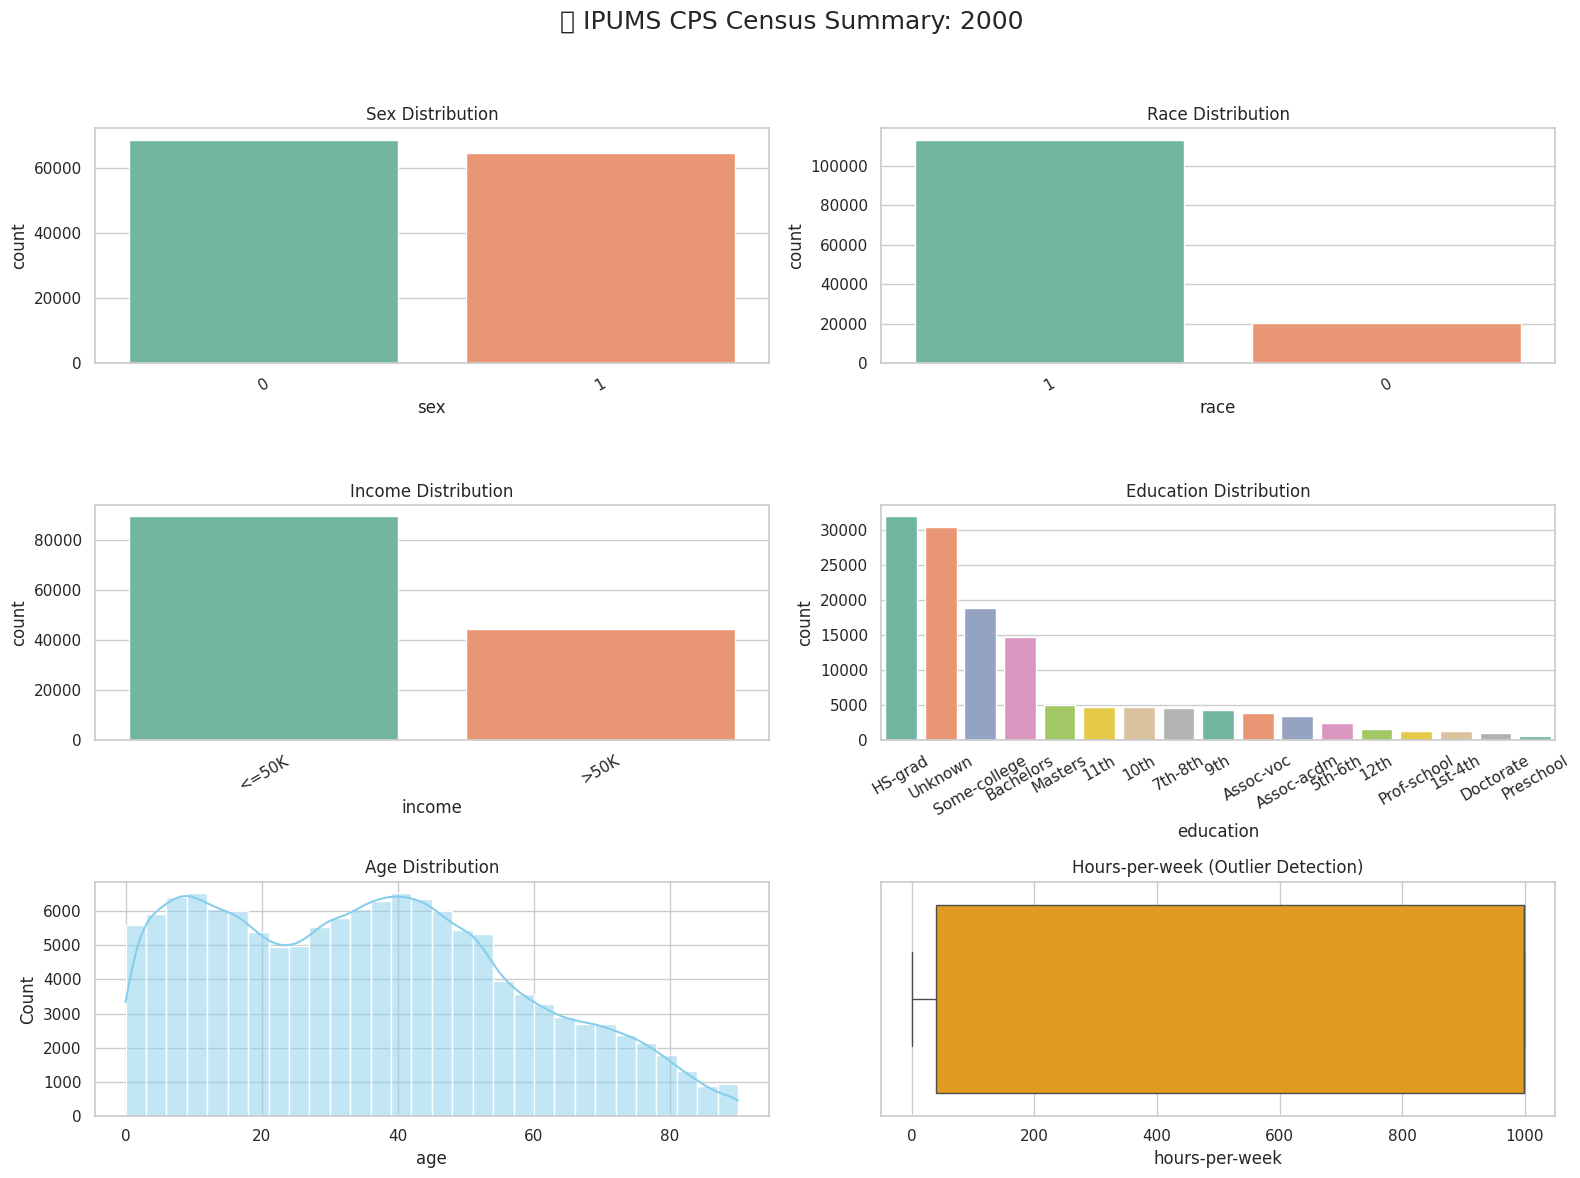

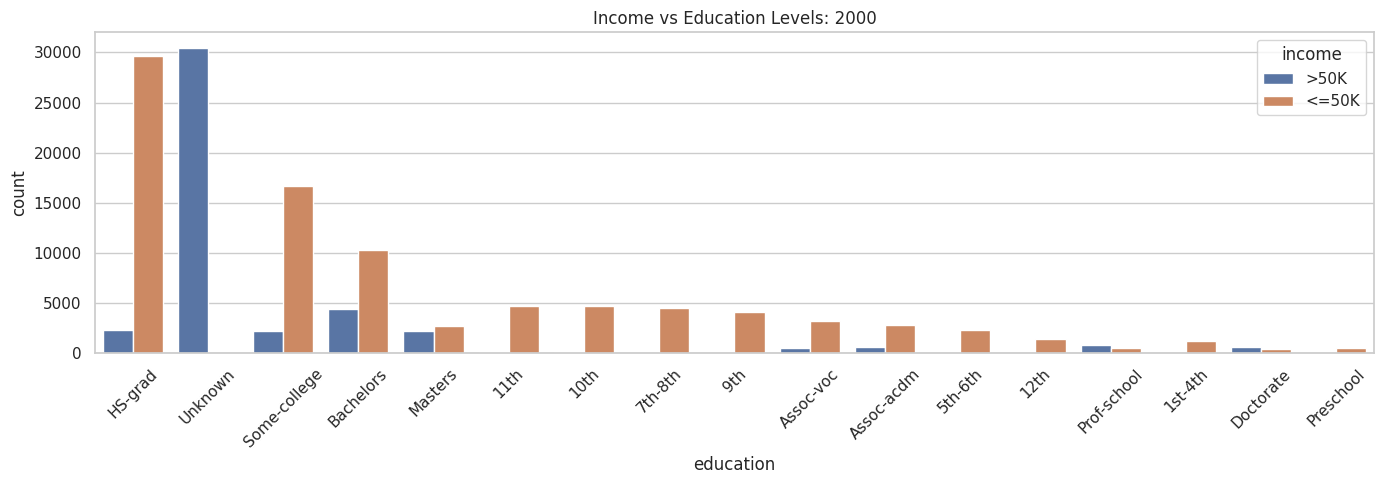


🔍 Year: 2005
Missing Value Summary:
sex                   0
race                  0
income                0
education             0
age                   0
hours-per-week        0
education-num     52844
capital-gain          0
capital-loss          0
fnlwgt                0
relationship          0
dtype: int64

Unique 'Unknown-like' value counts (nil, unknown):
sex: 0
race: 0
income: 0
education: 52844

Descriptive Statistics (Numerical):
                 age  hours-per-week  education-num   capital-gain  \
count  210648.000000   210648.000000  157804.000000  210648.000000   
mean       33.728766       16.479459       9.613102   25546.259532   
std        21.774268       20.582274       2.939550   43326.421200   
min         0.000000        0.000000       1.000000       0.000000   
25%        14.000000        0.000000       9.000000       0.000000   
50%        33.000000        0.000000       9.000000       0.000000   
75%        49.000000       40.000000      12.000000   99999.00000

/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWar

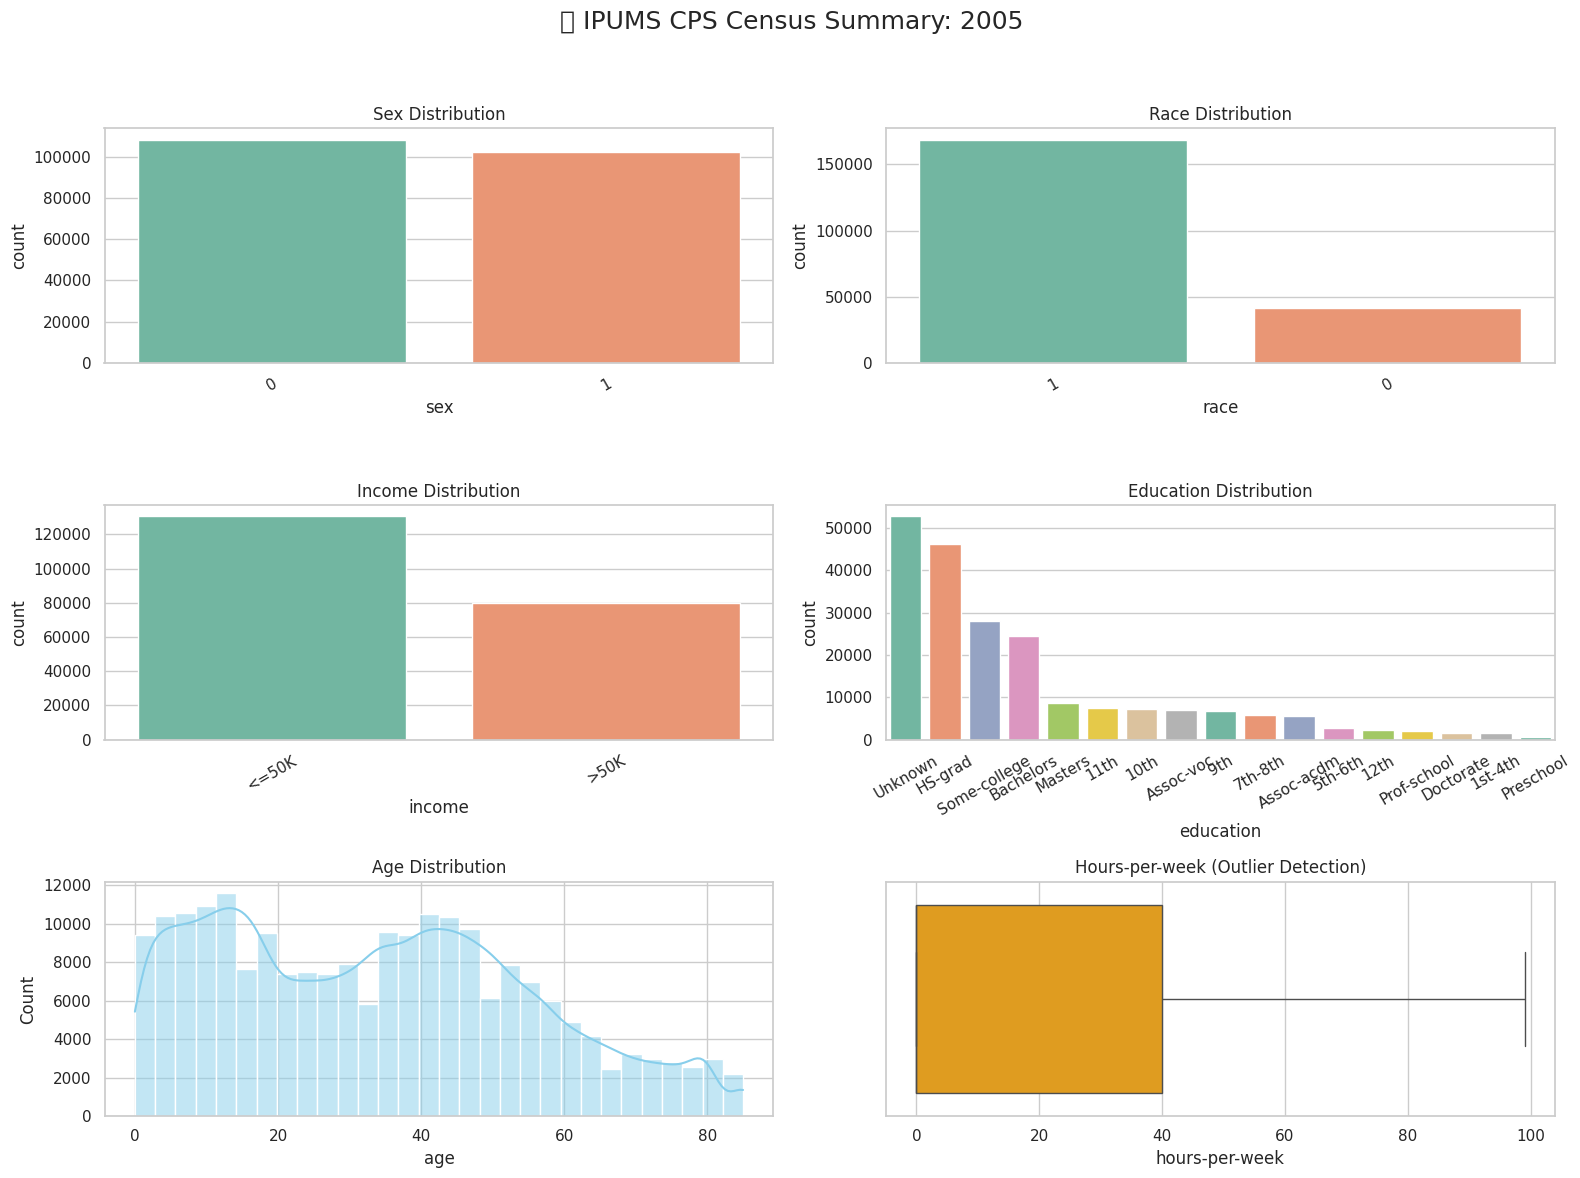

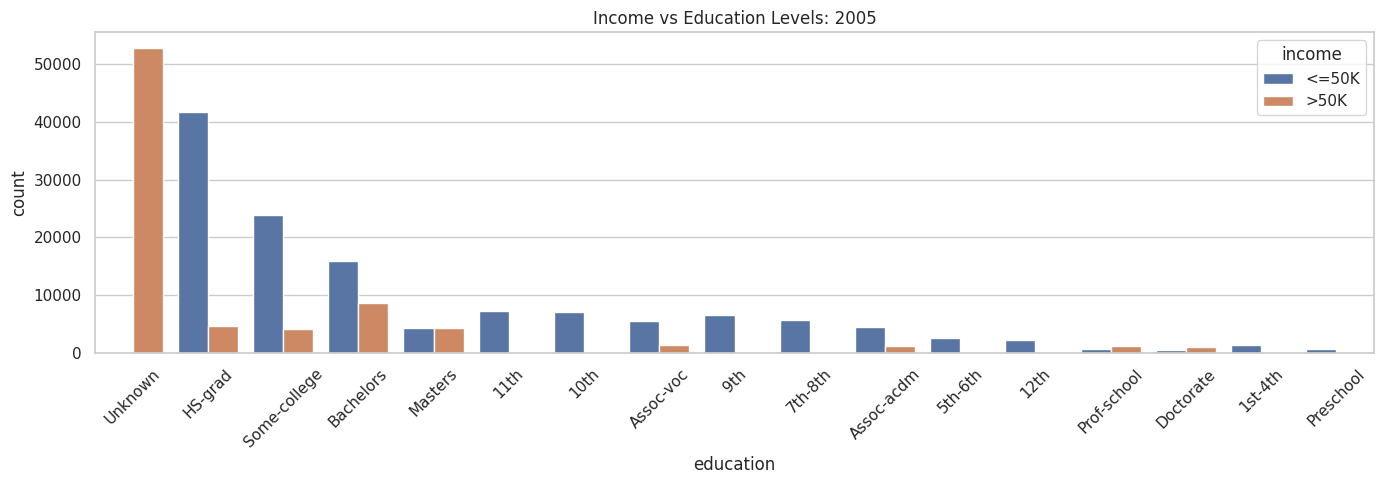


🔍 Year: 2010
Missing Value Summary:
sex                   0
race                  0
income                0
education             0
age                   0
hours-per-week        0
education-num     50193
capital-gain          0
capital-loss          0
fnlwgt                0
relationship          0
dtype: int64

Unique 'Unknown-like' value counts (nil, unknown):
sex: 0
race: 0
income: 0
education: 50193

Descriptive Statistics (Numerical):
                 age  hours-per-week  education-num  capital-gain  \
count  209802.000000    209802.00000  159609.000000      209802.0   
mean       34.609703        15.76361       9.811514           0.0   
std        22.051401        20.20228       2.902456           0.0   
min         0.000000         0.00000       1.000000           0.0   
25%        15.000000         0.00000       9.000000           0.0   
50%        34.000000         0.00000      10.000000           0.0   
75%        51.000000        40.00000      13.000000           0.0   
max

/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:47: UserWarni

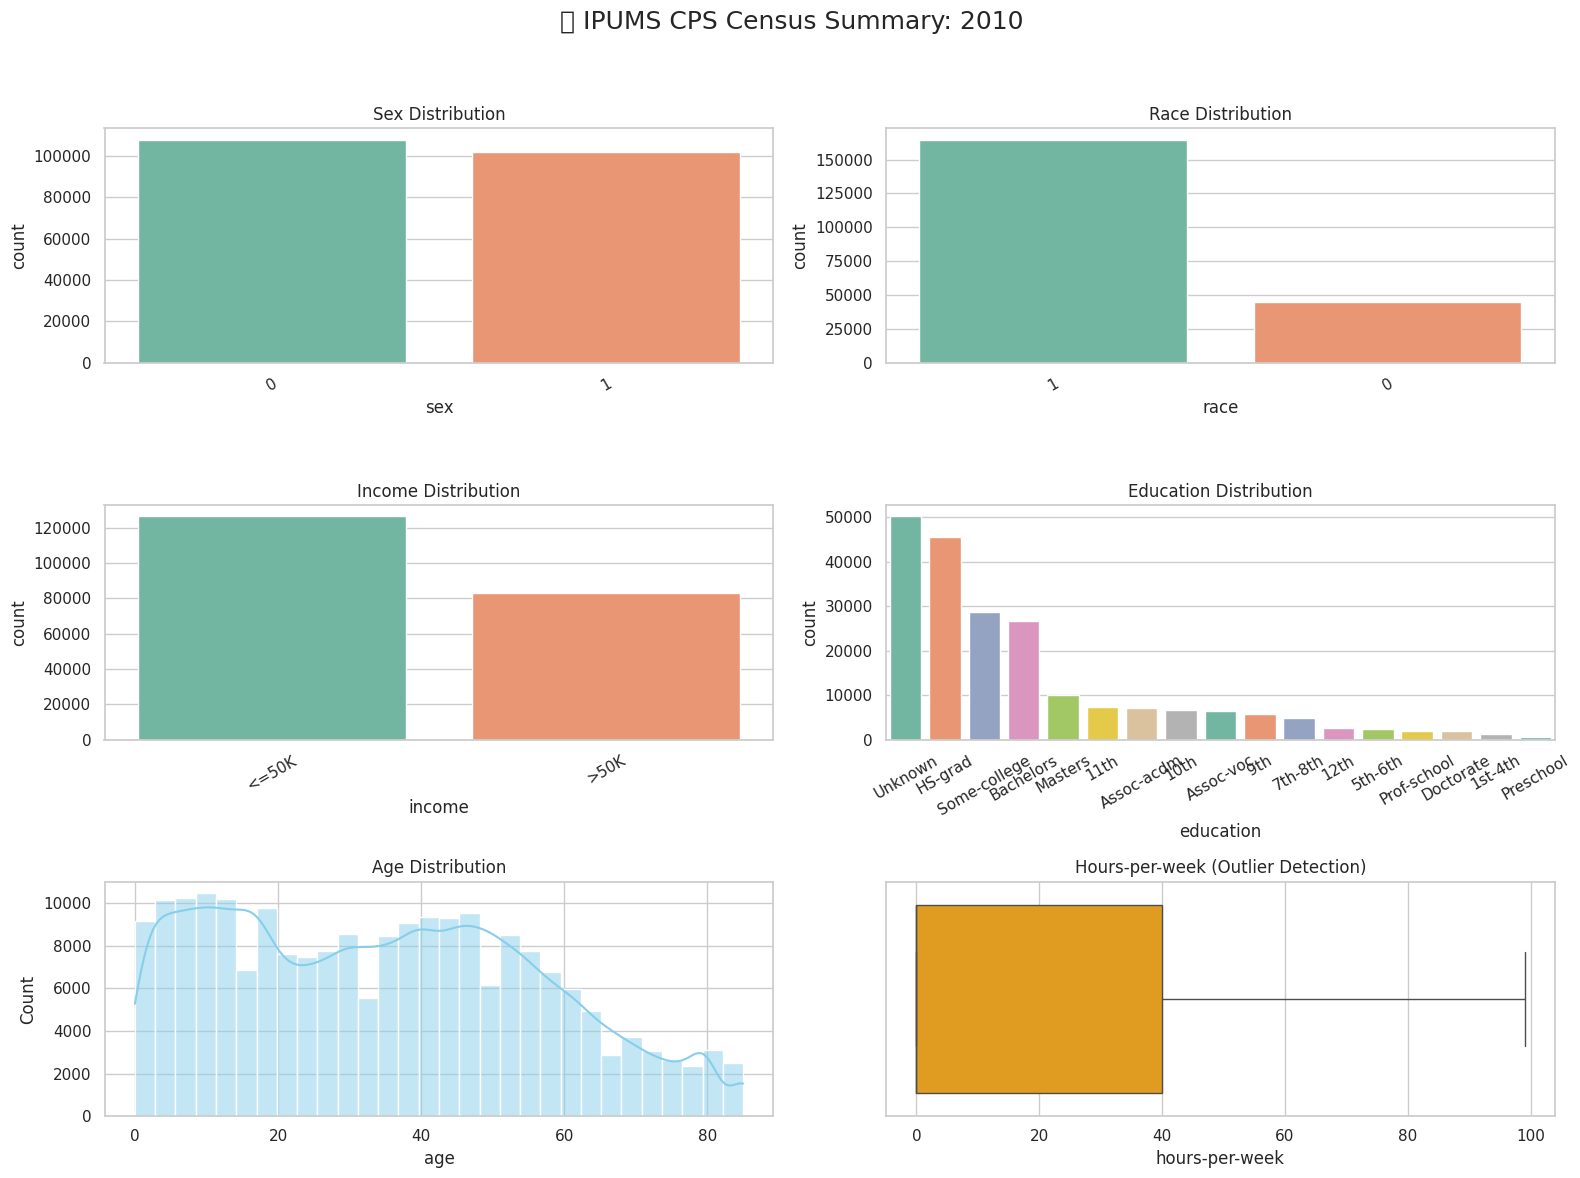

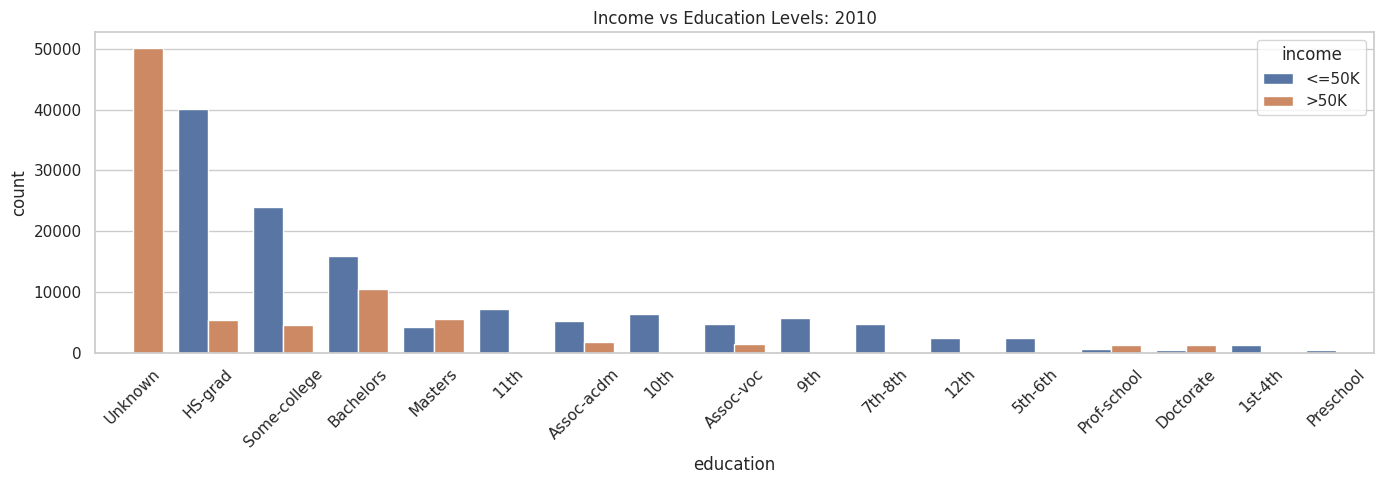


🔍 Year: 2015
Missing Value Summary:
sex                   0
race                  0
income                0
education             0
age                   0
hours-per-week        0
education-num     45103
capital-gain          0
capital-loss          0
fnlwgt                0
relationship          0
dtype: int64

Unique 'Unknown-like' value counts (nil, unknown):
sex: 0
race: 0
income: 0
education: 45103

Descriptive Statistics (Numerical):
                 age  hours-per-week  education-num  capital-gain  \
count  199024.000000   199024.000000  153921.000000      199024.0   
mean       36.032077       16.429199       9.997603           0.0   
std        22.518533       20.480259       2.912805           0.0   
min         0.000000        0.000000       1.000000           0.0   
25%        16.000000        0.000000       9.000000           0.0   
50%        35.000000        0.000000      10.000000           0.0   
75%        54.000000       40.000000      13.000000           0.0   
max

/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWar

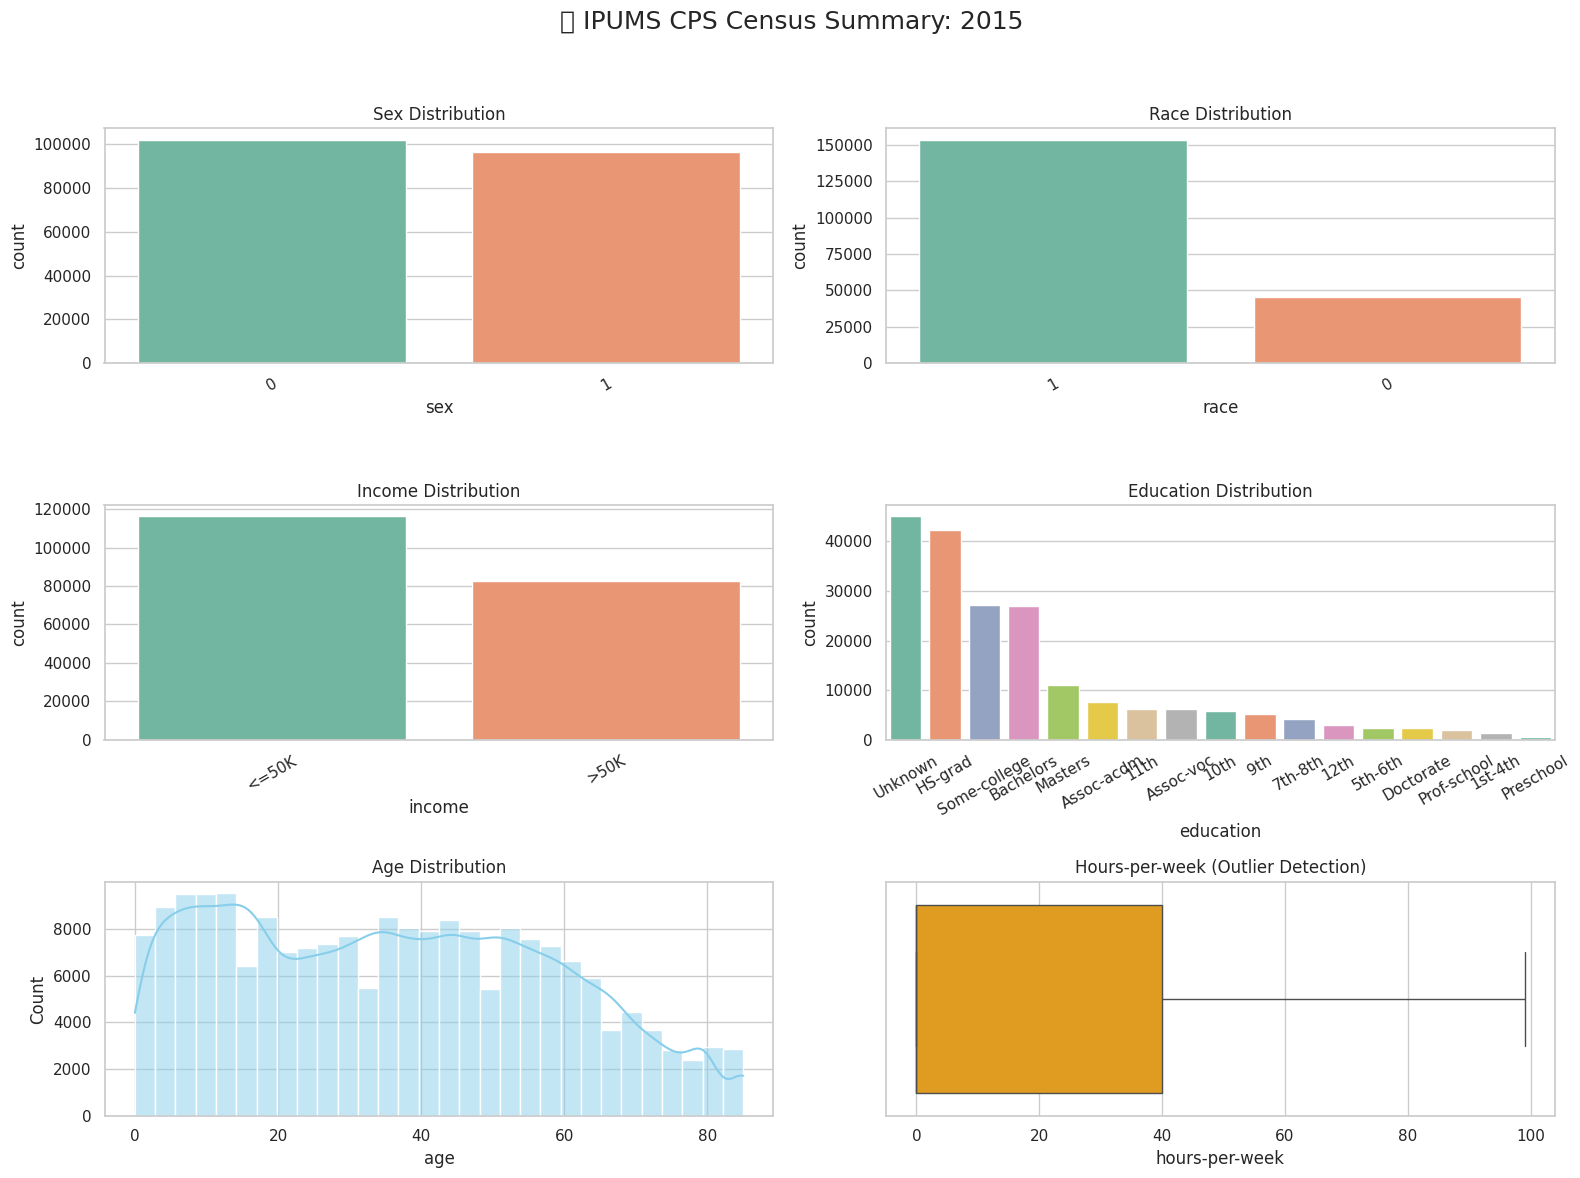

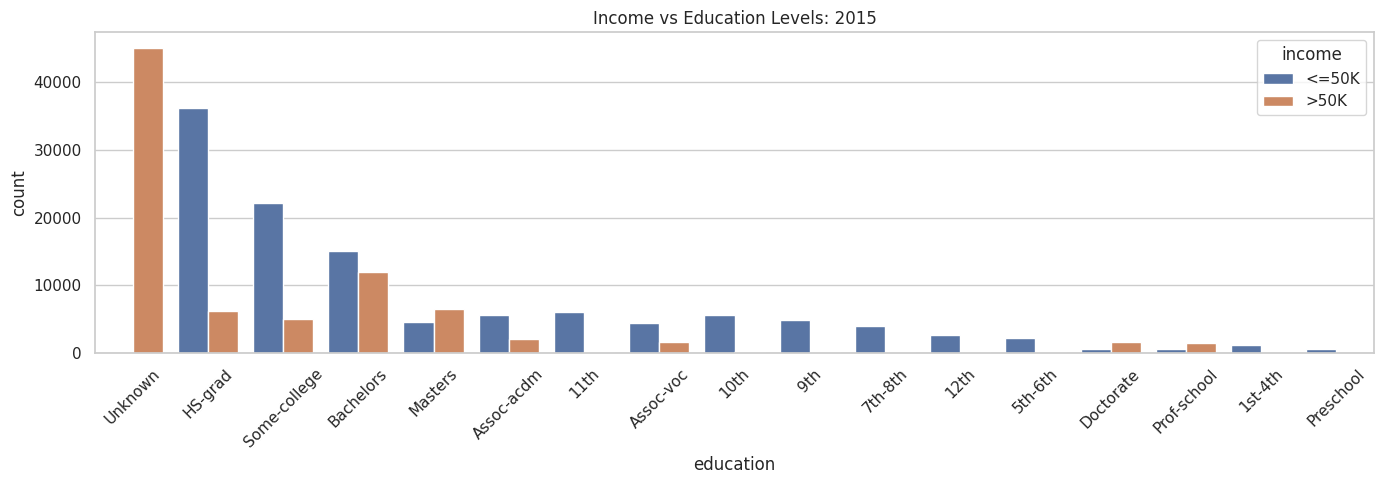


🔍 Year: 2020
Missing Value Summary:
sex                   0
race                  0
income                0
education             0
age                   0
hours-per-week        0
education-num     33153
capital-gain          0
capital-loss          0
fnlwgt                0
relationship          0
dtype: int64

Unique 'Unknown-like' value counts (nil, unknown):
sex: 0
race: 0
income: 0
education: 33153

Descriptive Statistics (Numerical):
                 age  hours-per-week  education-num  capital-gain  \
count  157959.000000   157959.000000  124806.000000      157959.0   
mean       38.135814      584.404193      10.340753           0.0   
std        23.170097      475.730296       2.856591           0.0   
min         0.000000        0.000000       1.000000           0.0   
25%        17.000000       40.000000       9.000000           0.0   
50%        38.000000      999.000000      10.000000           0.0   
75%        57.000000      999.000000      13.000000           0.0   
max

/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(f"summary_plots_{year}.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


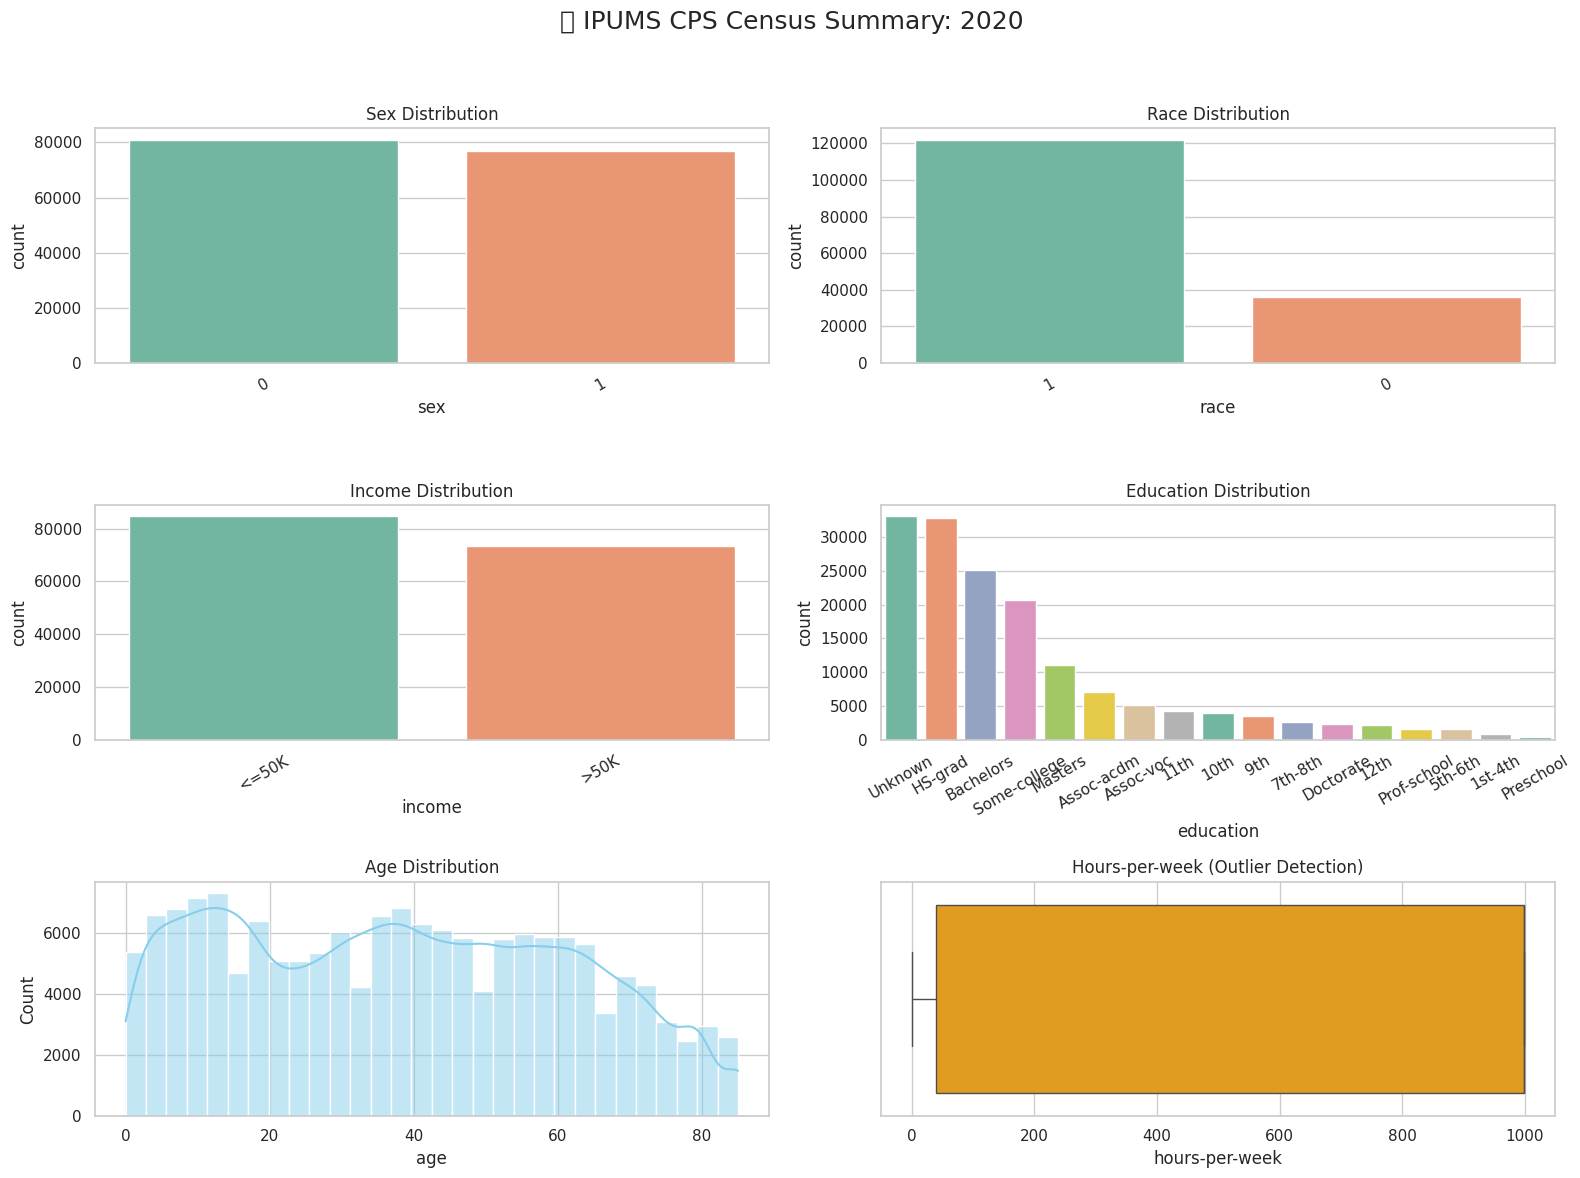

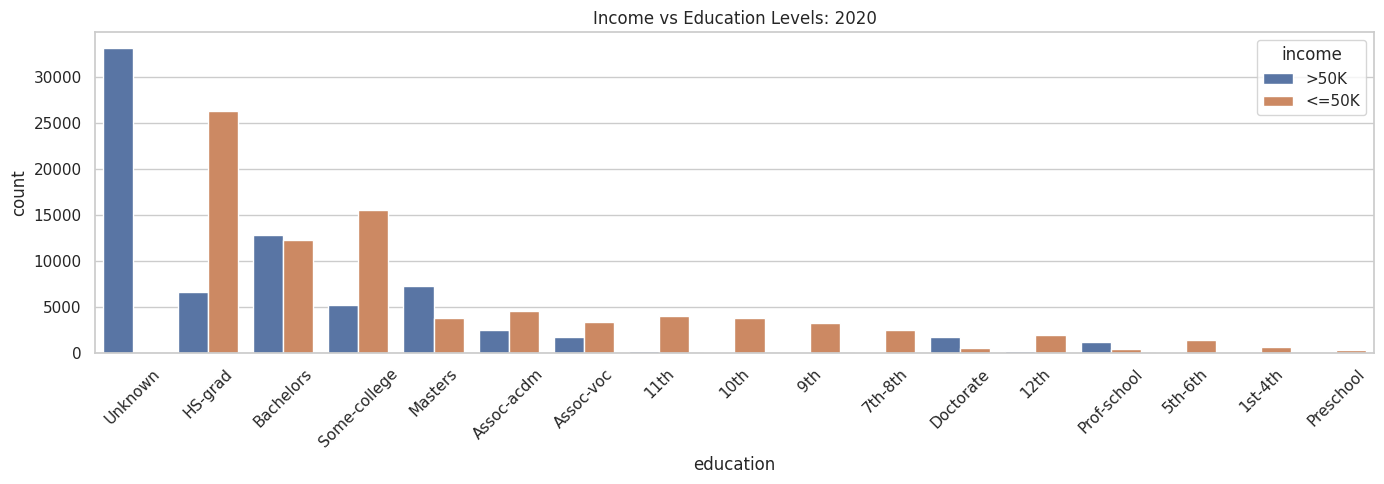


🔍 Year: 2023
Missing Value Summary:
sex                   0
race                  0
income                0
education             0
age                   0
hours-per-week        0
education-num     29483
capital-gain          0
capital-loss          0
fnlwgt                0
relationship          0
dtype: int64

Unique 'Unknown-like' value counts (nil, unknown):
sex: 0
race: 0
income: 0
education: 29483

Descriptive Statistics (Numerical):
                 age  hours-per-week  education-num  capital-gain  \
count  146133.000000   146133.000000  116650.000000      146133.0   
mean       38.731286      571.607036      10.351659           0.0   
std        23.316022      477.383139       2.867857           0.0   
min         0.000000        0.000000       1.000000           0.0   
25%        18.000000       40.000000       9.000000           0.0   
50%        38.000000      999.000000      10.000000           0.0   
75%        58.000000      999.000000      13.000000           0.0   
max

/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
/tmp/ipython-input-63-3617389108.py:47: UserWarni

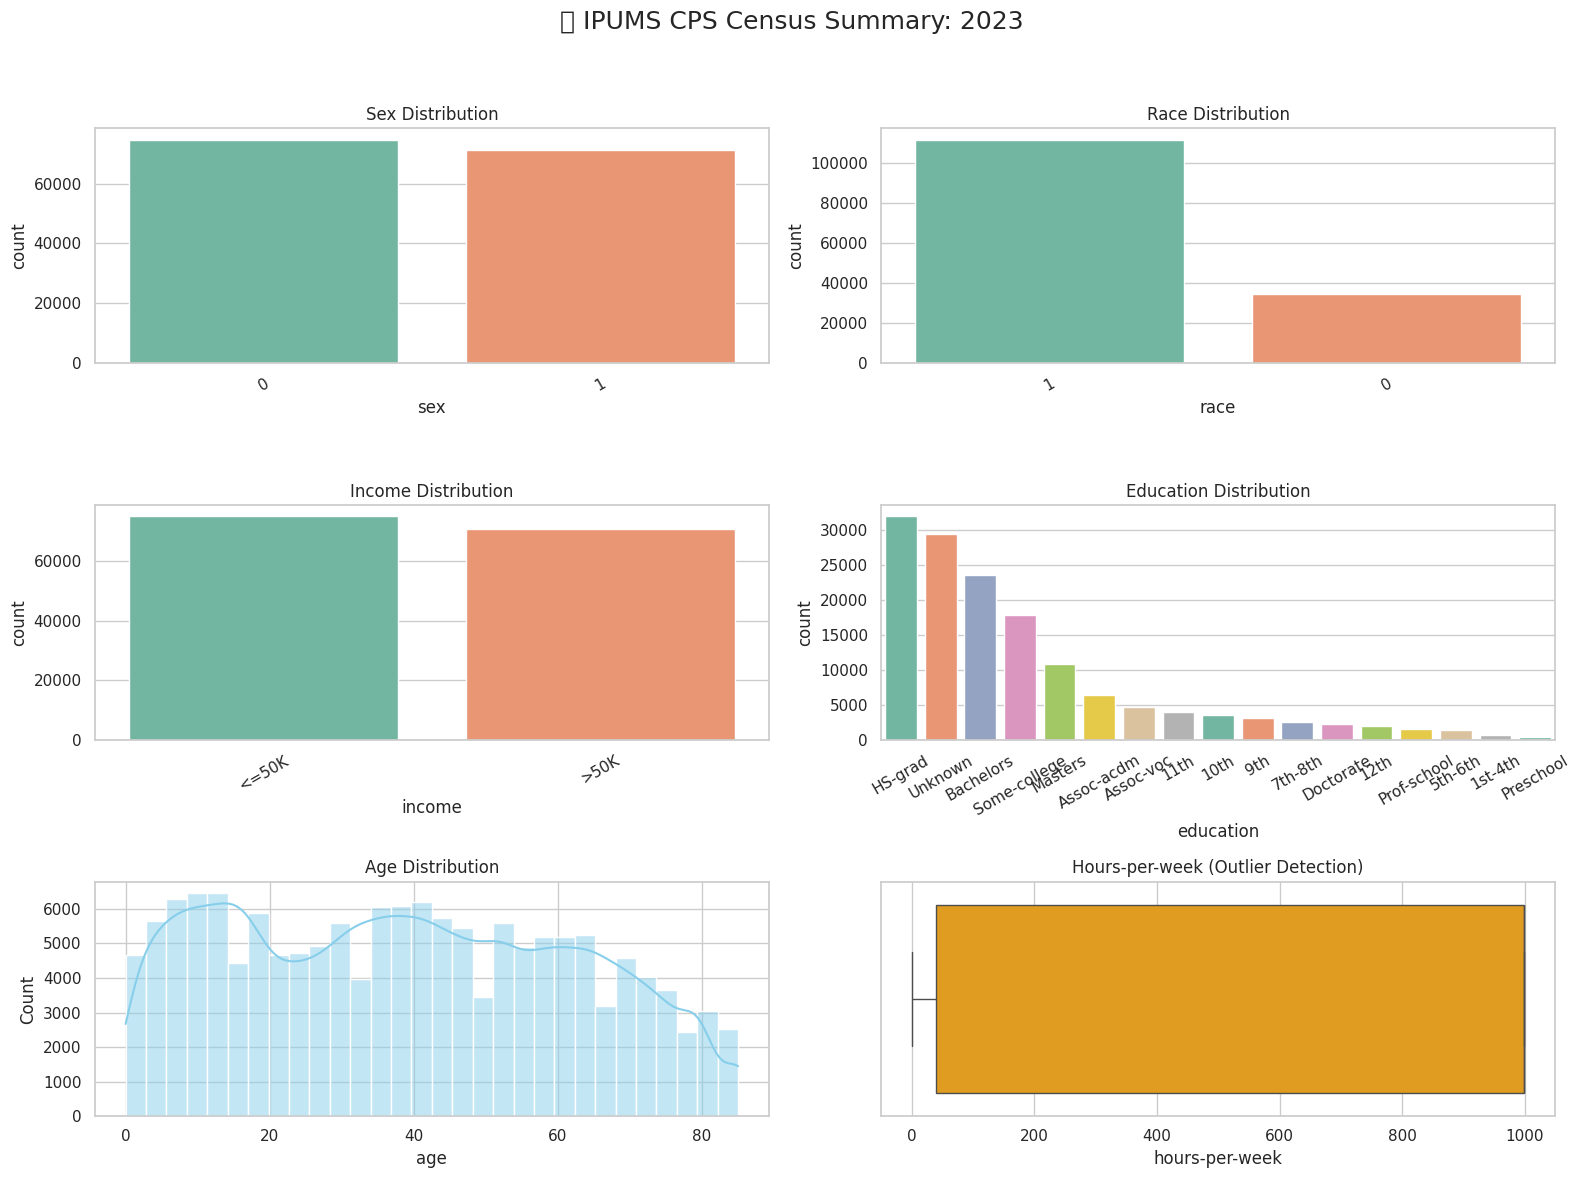

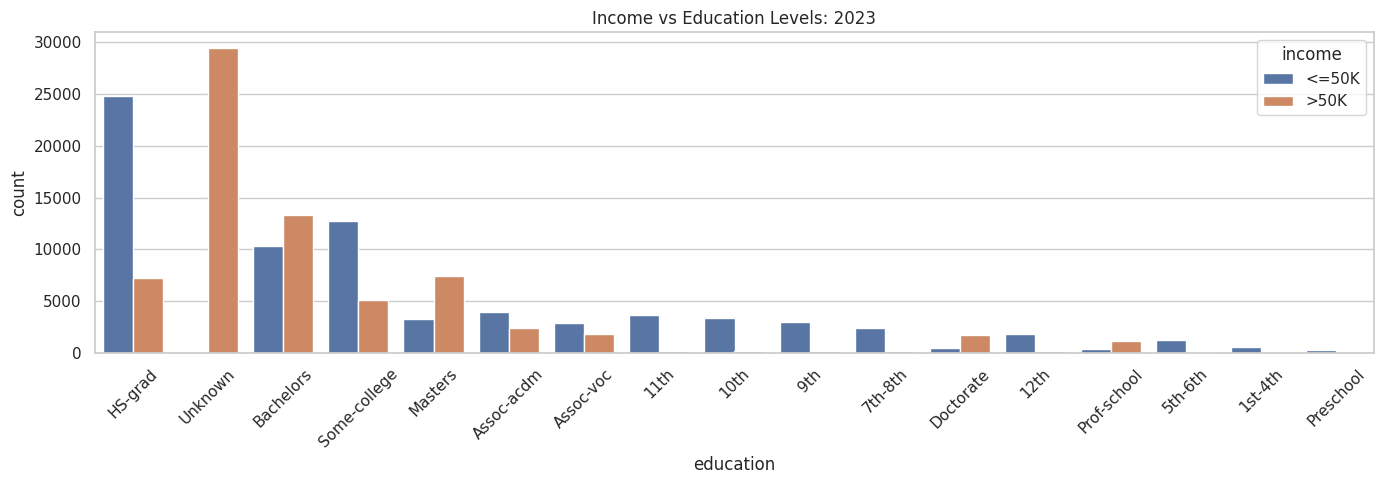

In [ ]:
# Define key variables
categorical_vars = ['sex', 'race', 'education']
numeric_vars = ['age', 'hours-per-week', 'education-num', 'capital-gain', 'capital-loss','income']
essential_vars = categorical_vars + numeric_vars + ['fnlwgt', 'relationship']

# Loop over each year
for year in sorted(df['YEAR'].unique()):
    print(f"\n🔍 Year: {year}")
    year_df = df[df['YEAR'] == year].copy()

    # --- Data Integrity Checks ---
    print("Missing Value Summary:")
    print(year_df[essential_vars].isna().sum())

    print("\nUnique 'Unknown-like' value counts (nil, unknown):")
    for col in categorical_vars:
        unknown_count = year_df[col].astype(str).str.lower().isin(['unknown', 'nil', '']).sum()
        print(f"{col}: {unknown_count}")

    print("\nDescriptive Statistics (Numerical):")
    print(year_df[numeric_vars].describe())

    # --- Plotting ---

    # Set plot style
    sns.set(style='whitegrid')
    plt.figure(figsize=(16, 12))
    plt.suptitle(f"📊 IPUMS CPS Census Summary: {year}", fontsize=18)

    # 1. Bar plots for categorical variables
    for i, cat in enumerate(categorical_vars):
        plt.subplot(3, 2, i+1)
        sns.countplot(data=year_df, x=cat, palette='Set2', order=year_df[cat].value_counts().index)
        plt.xticks(rotation=30)
        plt.title(f"{cat.capitalize()} Distribution")

    # 2. Age Distribution
    plt.subplot(3, 2, 5)
    sns.histplot(year_df['age'], bins=30, kde=True, color='skyblue')
    plt.title("Age Distribution")

    # 3. Hours-per-week Distribution
    plt.subplot(3, 2, 6)
    sns.boxplot(x=year_df['hours-per-week'], color='orange')
    plt.title("Hours-per-week (Outlier Detection)")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"summary_plots_{year}.png")
    plt.show()

    # --- Income vs Attributes ---
    plt.figure(figsize=(14, 5))
    sns.countplot(data=year_df, x='education', hue='income', order=year_df['education'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Income vs Education Levels: {year}")
    plt.tight_layout()
    plt.savefig(f"income_vs_education_{year}.png")
    plt.show()

In [10]:
for year in unique_years:
    print(f"Processing year {year}...")
    # Subset for the year
    year_df = df[df['YEAR'] == year].copy()

    # ✅ Apply UCI-style pre-filtering: (AGE > 16) & (INCTOT > 100) & (PERWT > 1) & (UHRSWORK > 0)
    year_df = year_df[
        (year_df['AGE'] > 16) &
        (year_df['INCTOT'] > 100) &
        (year_df['ASECWT'] > 1) &
        (year_df['UHRSWORK1'] > 0)
    ].copy()

    if len(year_df) == 0:
        print(f"⚠️ Skipping year {year}: no rows left after filtering.")
        continue

    # Process data
    processed_df = load_and_process_ipums(year_df)

    processed_df = processed_df[
    (processed_df['hours-per-week'] > 0) &
    (processed_df['hours-per-week'] < 168)
    ]

    processed_df = processed_df[processed_df['occupation'] != '?']

    if len(processed_df) == 0:
        print(f"⚠️ Skipping year {year}: all rows had unknown occupations.")
        continue

    print(f"✅ Year {year}: occupations remaining:")
    print(processed_df['occupation'].value_counts())

    # Stratified sampling: 50,000 total
    group_counts = processed_df['income'].value_counts()

    if len(group_counts) < 2:
        print(f"⚠️ Skipping year {year}: only one income group found.")
        continue

    # Compute samples per class based on proportions
    total = group_counts.sum()
    stratified_sample_sizes = {
        label: int(round(count / total * 50000))
        for label, count in group_counts.items()
    }

    # Sample separately and concatenate
    stratified_samples = []
    for label, size in stratified_sample_sizes.items():
        group_df = processed_df[processed_df['income'] == label]
        if len(group_df) < size:
            print(f"⚠️ Not enough samples in class {label} for year {year}, reducing to {len(group_df)}")
            size = len(group_df)
        stratified_samples.append(group_df.sample(n=size, random_state=42))

    final_df = pd.concat(stratified_samples).sample(frac=1, random_state=42)  # Shuffle
    final_df.to_csv(f"Adult_Census_{year}.csv", index=False)
    print(f"✅ Saved: Adult_Census_{year}.csv")

Processing year 2000...
✅ Year 2000: occupations remaining:
occupation
Prof-specialty       11107
Adm-clerical          7669
Other-service         6664
Craft-repair          5089
Machine-op-inspct     4910
Tech-support          4577
Transport-moving      4437
Sales                 3749
Exec-managerial       3164
Farming-fishing       1297
Protective-serv        672
Priv-house-serv        111
Handlers-cleaners       27
Name: count, dtype: int64
✅ Saved: Adult_Census_2000.csv
Processing year 2005...
✅ Year 2005: occupations remaining:
occupation
Other-services       15634
Adm-clerical         12557
Prof-specialty       11040
Machine-op-inspct     9527
Sales                 9495
Craft-repair          5076
Transport-moving      5001
Handlers-cleaners     4759
Exec-managerial       3745
Other-service         3215
Protective-serv       1741
Tech-support          1606
Farming-fishing       1071
Priv-house-serv        849
Name: count, dtype: int64
✅ Saved: Adult_Census_2005.csv
Processing year

In [ ]:
# View sample of the generated csv files
df_2005 = pd.read_csv('/content/Adult_Census_2005.csv')
df_2005.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Private,1652.47,Some-college,10,Married-civ-spouse,Other-services,Husband,1,0,0.0,0.0,40,Other,<=50K
1,37,Private,1264.21,HS-grad,9,Married-civ-spouse,Other-service,Wife,1,1,0.0,0.0,40,Other,<=50K
2,22,Private,505.52,Some-college,10,Never-married,Tech-support,Husband,1,1,0.0,0.0,40,United-States,<=50K
3,45,Private,256.08,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,0,1,0.0,0.0,40,United-States,<=50K
4,43,Local-gov,1267.41,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,1,1,0.0,195.0,40,Other,>50K


In [ ]:
df_2005.shape

(50000, 15)

In [ ]:
df_2005['occupation'].value_counts()

,count
occupation,
Other-services,9099
Adm-clerical,7258
Prof-specialty,6449
Sales,5606
Machine-op-inspct,5544
Craft-repair,3041
Transport-moving,2914
Handlers-cleaners,2816
Exec-managerial,2222


In [ ]:
df_2005['race'].value_counts()

,count
race,
1,41142
0,8858


In [ ]:
df.shape

(1057276, 38)

In [ ]:
from sklearn.utils import resample

# Define sensitive attributes to balance (must be in processed_df)
sensitive_features = ['sex', 'race']

for year in unique_years:
    print(f"Processing year {year}...")

    year_df = df[df['YEAR'] == year].copy()

    # Apply UCI-style filters
    year_df = year_df[
        (year_df['AGE'] > 16) &
        (year_df['INCTOT'] > 100) &
        (year_df['ASECWT'] > 1) &
        (year_df['UHRSWORK1'] > 0)
    ].copy()

    if len(year_df) == 0:
        print(f"⚠️ Skipping year {year}: no rows after filtering.")
        continue

    processed_df = load_and_process_ipums(year_df)
    processed_df = processed_df[
        (processed_df['hours-per-week'] > 0) &
        (processed_df['hours-per-week'] < 168)
    ]

    # Stratified income sampling
    group_counts = processed_df['income'].value_counts()
    if len(group_counts) < 2:
        print(f"⚠️ Skipping year {year}: only one income group.")
        continue

    total = group_counts.sum()
    stratified_sample_sizes = {
        label: int(round(count / total * 50000))
        for label, count in group_counts.items()
    }

    stratified_samples = []
    for label, size in stratified_sample_sizes.items():
        group_df = processed_df[processed_df['income'] == label]

        # Resample sensitive features within income group
        # Goal: equal representation of sex & race (adjust as needed)
        min_count = group_df.groupby(sensitive_features).size().min()
        if min_count == 0:
            print(f"⚠️ Skipping year {year}: missing subgroup in {sensitive_features}")
            continue

        balanced_subgroups = []
        for _, subgroup in group_df.groupby(sensitive_features):
            resampled = resample(subgroup, n_samples=min_count, replace=False, random_state=42)
            balanced_subgroups.append(resampled)

        balanced_df = pd.concat(balanced_subgroups)

        # If too large, downsample to target size
        if len(balanced_df) > size:
            balanced_df = balanced_df.sample(n=size, random_state=42)

        stratified_samples.append(balanced_df)

    if not stratified_samples:
        print(f"⚠️ Skipping year {year}: no valid samples after balancing.")
        continue

    final_df = pd.concat(stratified_samples).sample(frac=1, random_state=42)
    final_df.to_csv(f"Adult_Census_{year}.csv", index=False)
    print(f"✅ Saved: Adult_Census_{year}.csv")

NameError: name 'unique_years' is not defined

In [ ]:
df_2000 = pd.read_csv('/content/Adult_Census_2000.csv')

In [ ]:
df_2000['sex'].value_counts()

,count
sex,
0,50000


### Old codes

In [ ]:
def load_and_process_ipums(df):

    # Gender
    df['sex'] = df['SEX'].apply(lambda x: 1 if str(x).strip() == 'Male' else 0)

    # Race
    race_map = {
        1: 'White', 2: 'Black', 3: 'Amer-Indian-Eskimo',
        4: 'Asian-Pac-Islander', 5: 'Asian-Pac-Islander', 6: 'Other'
    }
    df['race_label'] = df['RACE'].map(race_map)
    df['race'] = df['race_label'].apply(lambda x: 1 if x == 'White' else 0)

     # Occupation
    occupation_map = {
        1: 'Adm-clerical', 2: 'Craft-repair', 3: 'Exec-managerial',
        4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct',
        7: 'Other-service', 8: 'Prof-specialty', 9: 'Protective-serv',
        10: 'Sales', 11: 'Tech-support', 12: 'Transport-moving'
    }
    df['occupation'] = df['OCC'].map(occupation_map).fillna('Other')

    # Workclass
    workclass_map = {
        1: 'Private', 2: 'Self-emp-not-inc', 3: 'Self-emp-inc',
        4: 'Federal-gov', 5: 'State-gov', 6: 'Local-gov',
        7: 'Without-pay', 8: 'Never-worked'
    }
    df['workclass'] = df['CLASSWKR'].map(workclass_map).fillna('Other')

    # Education
    educ_map = {
    0: ('N/A or NIU', None),
    1: ('Nursery school to grade 4', 1),
    2: ('Grade 5, 6, 7, or 8', 2),
    3: ('Grade 9', 3),
    4: ('Grade 10', 4),
    5: ('Grade 11', 5),
    6: ('Grade 12', 6),  # no diploma
    7: ('HS-grad', 7),
    8: ('Some college, less than 1 year', 8),
    9: ('Some college, 1+ years, no degree', 9),
    10: ('Assoc-acdm', 10),
    11: ('Assoc-voc', 11),
    12: ('Bachelors', 12),
    13: ('Masters', 13),
    14: ('Professional degree', 14),
    15: ('Doctorate degree', 15),
    999: ('Unknown or Missing', None)
    }
    # Map label and numeric
    df['education'] = df['EDUC'].map(lambda x: educ_map.get(x, ('Unknown', None))[0])
    df['education-num'] = df['EDUC'].map(lambda x: educ_map.get(x, ('Unknown', None))[1])
    #df = df[df['education-num'].notna()]

    # Marital status
    marital_map = {
        1: 'Married-civ-spouse', 2: 'Married-spouse-absent', 3: 'Separated',
        4: 'Divorced', 5: 'Widowed', 6: 'Never-married'
    }
    df['marital-status'] = df['MARST'].map(marital_map).fillna('Other')

    # Native country (birthplace)
    native_country_map = {
        57: 'United-States', 58: 'Mexico', 59: 'Puerto-Rico', 60: 'El-Salvador',
        61: 'Dominican-Republic', 62: 'Guatemala', 63: 'Columbia', 64: 'Vietnam',
        65: 'Haiti', 66: 'Nicaragua', 67: 'Peru', 68: 'Ecuador', 69: 'Cuba',
        70: 'Cambodia', 71: 'India', 72: 'Japan', 73: 'China', 74: 'South',
        75: 'Trinadad&Tobago', 76: 'Jamaica', 77: 'Laos', 78: 'Taiwan',
        79: 'Iran', 80: 'Thailand', 81: 'Philippines', 82: 'Italy',
        83: 'Poland', 84: 'Vietnam', 85: 'Portugal', 86: 'Greece',
        87: 'France', 88: 'Ireland', 89: 'Hong', 90: 'Hungary',
        91: 'Holand', 92: 'Scotland', 93: 'Yugoslavia', 94: 'England',
        95: 'Germany', 96: 'Canada'
    }
    df['native-country'] = df['BPL'].map(native_country_map).fillna('Others')

    # Income
    df['income'] = df['INCTOT'].apply(lambda x: 1 if x > 50000 else 0)

    # Relationship (from RELATE)
    relationship_map = {
        101: 'Husband',
        201: 'Wife',
        301: 'Own-child',
        401: 'Other-relative',
        501: 'Non-relative',
        601: 'Unmarried-partner',
        # Extend as needed
    }
    df['relationship'] = df['RELATE'].map(relationship_map).fillna('Other')

    # Age and hours
    df['age'] = df['AGE']
    df['hours-per-week'] = df['UHRSWORK1']
    df['fnlwgt'] = df['ASECWT']
    df['capital-gain'] = df['CAPGAIN'].fillna(0)
    df['capital-loss'] = df['CAPLOSS'].fillna(0)

    # Final column selection
    final_cols = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]
    df = df[final_cols]

    return df